# Minh - Analysis Price - Area

Load data

In [1]:
import pandas as pd
import numpy as np
import re
from tqdm.auto import tqdm

origin_df = pd.read_csv('data/stage_9.csv', low_memory=False)
origin_df = origin_df.fillna('')
origin_df = origin_df.astype('str')


In [2]:
df = origin_df.copy()

In [17]:
df.shape

(205732, 15)

In [3]:
df2 = pd.read_csv('data/district_data_2017.csv', low_memory=False)

In [9]:
df.areaNumber

0         36.0
1         33.0
2         42.0
3         57.0
4         53.0
          ... 
205727    54.0
205728    38.0
205729    40.0
205730    30.0
205731     0.0
Name: areaNumber, Length: 205732, dtype: object

In [10]:
def process_area_cell(x):
    try:
        area = float(x)
        return area
    except:
        return np.nan
    

In [11]:
new_df = df.copy()

In [12]:
new_df.price = df.price.apply(process_area_cell)

In [18]:
new_df.areaNumber = df.areaNumber.apply(process_area_cell)

In [16]:
new_df.shape

(205732, 15)

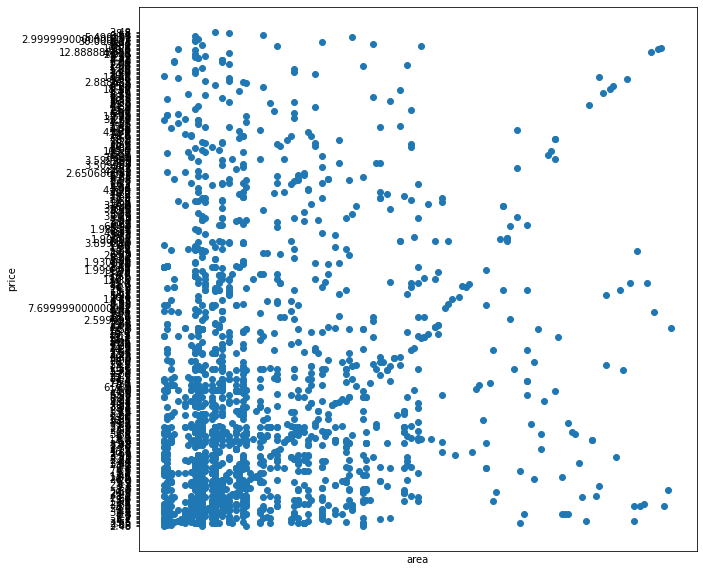

In [26]:
import matplotlib.pyplot as plt

# uniques, counts = np.unique(locations, return_counts=True)

# count_sort_ind = np.argsort(-counts)

# uniques = uniques[count_sort_ind]
# counts = counts[count_sort_ind]

# district_areas = []
# for u in uniques:
#     for i, row in df2.iterrows():
#         if row.district.lower() == u:
#             district_areas.append(row.area)
#             break

fig, ax = plt.subplots(figsize=(10, 10), sharex=True)

ax.scatter(df.areaNumber[:2000], df.price[:2000])
ax.set_ylabel('price')
ax.set_xlabel('area')
# ax.set_xticklabels(uniques, rotation='vertical')
# plt.xticks(rotation='vertical')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
# ax[1].set_xticks(uniques)
# fig.suptitle('Location Analysis')
plt.show()

In [125]:
# Analysis

from scipy.stats import entropy

def cal_entropy(labels):
    uniques, counts = np.unique(labels, return_counts=True)
    return entropy(counts)

def cal_gini(labels):
    uniques, counts = np.unique(labels, return_counts=True)
    c = counts / len(labels)
    return 1 - np.sum(np.power(c, 2))

    
gini = cal_gini(locations)
e = cal_entropy(locations)

e = cal_entropy([1,1,1,1])
gini = cal_gini([1,1,1,1])

print('SUMMARY ABOUT LOCATIONS: ')
print('Mode: ', uniques[0])
print('Entropy: ', e)
print('Ln(k): ', np.log(len(np.unique(locations))))
print('Gini: ', gini)
print('1 - 1/K: ', 1 - 1/len(np.unique(locations)))

print('')

SUMMARY ABOUT LOCATIONS: 
Mode:  đống đa
Entropy:  0.0
Ln(k):  3.295836866004329
Gini:  0.0
1 - 1/K:  0.962962962962963



In [28]:
df2

,district,population,area,structure
0,Chương Mỹ,330.000,237.38,"2 thị trấn, 30 xã"
1,Đan Phượng,162.900,78.00,"1 thị trấn, 15 xã"
2,Đông Anh,381.500,185.62,"1 thị trấn, 23 xã"
3,Gia Lâm,277.600,116.71,"2 thị trấn, 20 xã"
4,Hoài Đức,229.400,84.93,"1 thị trấn, 19 xã"
5,Mê Linh,226.800,142.46,"2 thị trấn, 16 xã"
6,Mỹ Đức,194.400,226.25,"1 thị trấn, 21 xã"
7,Phú Xuyên,211.100,171.10,"2 thị trấn, 25 xã"
8,Phúc Thọ,182.300,118.63,"1 thị trấn, 20 xã"
9,Quốc Oai,188.000,151.13,"1 thị trấn, 20 xã"
